https://wikidocs.net/50082

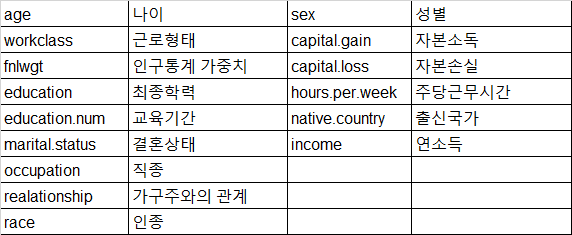

Adult Income 데이터셋(또는 "Census Income" 데이터셋)은 미국 인구 조사 데이터를 바탕으로 각 개인의 특성에 따른 소득 수준을 예측하는 데 사용됩니다. 이 데이터셋의 컬럼들은 다음과 같습니다:

- age: 나이 (숫자)
개인의 나이를 나타냅니다.
- workclass: 직업 유형 (범주형)
개인의 직업 유형을 나타냅니다. 예를 들어, 'Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked' 등이 있습니다.
- fnlwgt: 최종 가중치 (숫자)
인구 조사에서 각 행이 전체 인구를 대표하는 비율을 나타내는 가중치입니다. 더 큰 값은 더 큰 대표성을 의미합니다.
- education: 교육 수준 (범주형)
개인의 교육 수준을 나타냅니다. 예를 들어, 'Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool' 등이 있습니다.
- education-num: 교육 수준(숫자) (숫자)
교육 수준을 숫자로 나타낸 것입니다. 예를 들어, 'Bachelors'는 13, 'HS-grad'는 9 등으로 교육의 연수를 나타냅니다.
- marital-status: 결혼 상태 (범주형)
개인의 결혼 상태를 나타냅니다. 예를 들어, 'Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse' 등이 있습니다.
- occupation: 직업 (범주형)
개인의 직업을 나타냅니다. 예를 들어, 'Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces' 등이 있습니다.
- relationship: 가족 관계 (범주형)
개인의 가족 관계를 나타냅니다. 예를 들어, 'Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried' 등이 있습니다.
- race: 인종 (범주형)
개인의 인종을 나타냅니다. 예를 들어, 'White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black' 등이 있습니다.
- sex: 성별 (범주형)
개인의 성별을 나타냅니다. 'Male' 또는 'Female'입니다.
- capital-gain: 자본 이득 (숫자)
개인의 자본 이득을 나타냅니다. 자본 자산의 매매에서 발생하는 이익입니다.
- capital-loss: 자본 손실 (숫자)
개인의 자본 손실을 나타냅니다. 자본 자산의 매매에서 발생하는 손실입니다.
- hours-per-week: 주당 근무 시간 (숫자)
개인이 주당 일하는 시간을 나타냅니다.
- native-country: 출생 국가 (범주형)
개인의 출생 국가를 나타냅니다. 예를 들어, 'United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands' 등이 있습니다.
- income: 소득 수준 (범주형)
개인의 소득 수준을 나타냅니다. ' <=50K' 또는 ' >50K'로, 연 소득이 50,000달러 이하인지 초과인지를 나타냅니다.

Task1_0722. Adult Income 데이터셋을 이용한 전처리 및 분류 모델(소득이 50K 이상인지 예측)을 아래 설명을 참조하여 수행하세요.

[ 문제 설명 ]

- Adult Income 데이터셋을 로드합니다.
- 결측치를 처리합니다.
- 이상치를 제외합니다.
- 파생 변수를 작성합니다.
- 범주형 변수를 인코딩합니다.
- 변수 선택 및 독립변수 종속변수를 분리합니다.
- 데이터를 표준화합니다.
- 데이터셋을 학습용과 테스트용으로 나눕니다.
- Logistic Regression 모델 생성 및 학습합니다.
- 예측 및 평가합니다.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



# 1. 데이터 로드
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

### ?는 모두 np.nan으로 처리
data = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)


In [18]:
data.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
for column in data.columns:
  print(column, data[column].unique())

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt [ 77516  83311 215646 ...  34066  84661 257302]
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
education-num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-

In [21]:
## ?는 모두 np.nan으로 변경됨

value_to_find = '?'
locations = []

# 데이터프레임에서 특정 값의 위치를 찾기
for column in data.columns:
    for index, value in data[column].items():
        if value == value_to_find:
            locations.append((column, index))

# 결과 출력
for column, index in locations:
    print(f"Value '{value_to_find}' found in column '{column}' at row '{index}'")

In [22]:
# NaN 값 확인
nan_locations = data.isna()

# NaN 값이 있는 위치 출력
for column in nan_locations.columns:
    for index, is_nan in nan_locations[column].items():
        if is_nan:
            print(f"NaN found in column '{column}' at row '{index}'")

NaN found in column 'workclass' at row '27'
NaN found in column 'workclass' at row '61'
NaN found in column 'workclass' at row '69'
NaN found in column 'workclass' at row '77'
NaN found in column 'workclass' at row '106'
NaN found in column 'workclass' at row '128'
NaN found in column 'workclass' at row '149'
NaN found in column 'workclass' at row '154'
NaN found in column 'workclass' at row '160'
NaN found in column 'workclass' at row '187'
NaN found in column 'workclass' at row '201'
NaN found in column 'workclass' at row '221'
NaN found in column 'workclass' at row '226'
NaN found in column 'workclass' at row '243'
NaN found in column 'workclass' at row '266'
NaN found in column 'workclass' at row '297'
NaN found in column 'workclass' at row '312'
NaN found in column 'workclass' at row '326'
NaN found in column 'workclass' at row '346'
NaN found in column 'workclass' at row '347'
NaN found in column 'workclass' at row '354'
NaN found in column 'workclass' at row '397'
NaN found in c

In [23]:
nan_counts = data.isna().sum()

# 결과 출력
print(nan_counts)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [24]:
# 2. 결측치를 처리합니다.
### 결측치를 가장 빈번한 data로 대체할 수 있지만, 결측치를 갖는 컬럼이 "workclass", "occupation", "native-country"으로. 결측치는 drop시키는것이 유리하다고 판단

df = data.dropna()
nan_counts = df.isna().sum()

# 결과 출력
print(nan_counts)
df.info()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capita

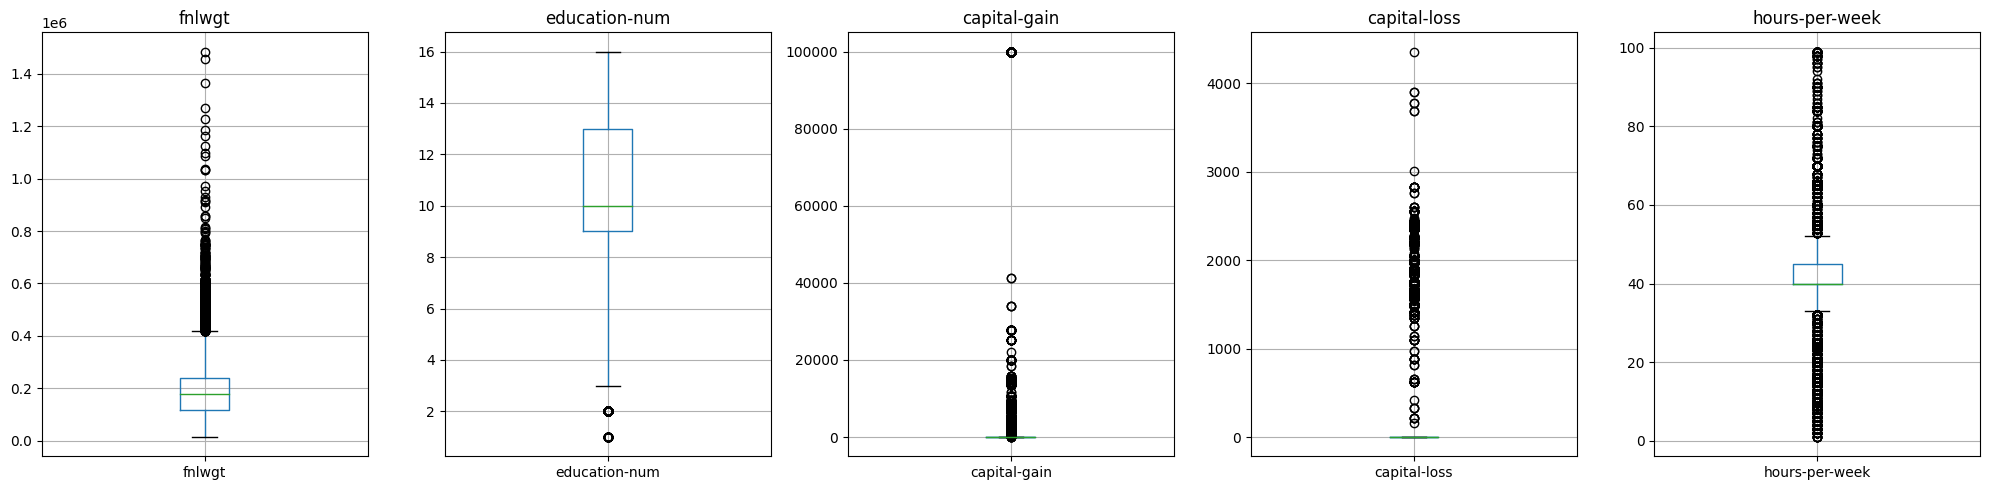

In [25]:
from matplotlib import pyplot as plt

# 박스 플롯을 그릴 열 리스트
columns_to_plot = ['fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# 서브플롯 설정
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

# 각 열에 대해 박스 플롯 생성
for i, column in enumerate(columns_to_plot):
    df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# 레이아웃 조정
plt.tight_layout()
plt.show()

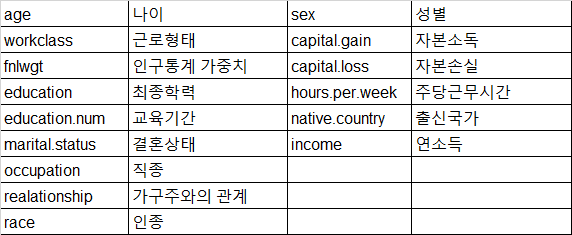

In [26]:
df2=df.copy()
## 이상치 제거 전 DF의 row number: 30162
# 3. 이상치를 제외합니다.
### fnlwgt, capital-gain, capital-loss는 분류 모델 적용에서 제외

# 이상치 제거 함수 정의
def remove_outliers(df2, column, factor=1.5):
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    df2 = df2[(df2[column] >= lower_bound) & (df2[column] <= upper_bound)]
    return df2



columns_to_check = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for column in columns_to_check:
    df2 = remove_outliers(df2, column)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18458 entries, 2 to 32558
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             18458 non-null  int64 
 1   workclass       18458 non-null  object
 2   fnlwgt          18458 non-null  int64 
 3   education       18458 non-null  object
 4   education-num   18458 non-null  int64 
 5   marital-status  18458 non-null  object
 6   occupation      18458 non-null  object
 7   relationship    18458 non-null  object
 8   race            18458 non-null  object
 9   sex             18458 non-null  object
 10  capital-gain    18458 non-null  int64 
 11  capital-loss    18458 non-null  int64 
 12  hours-per-week  18458 non-null  int64 
 13  native-country  18458 non-null  object
 14  income          18458 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.3+ MB


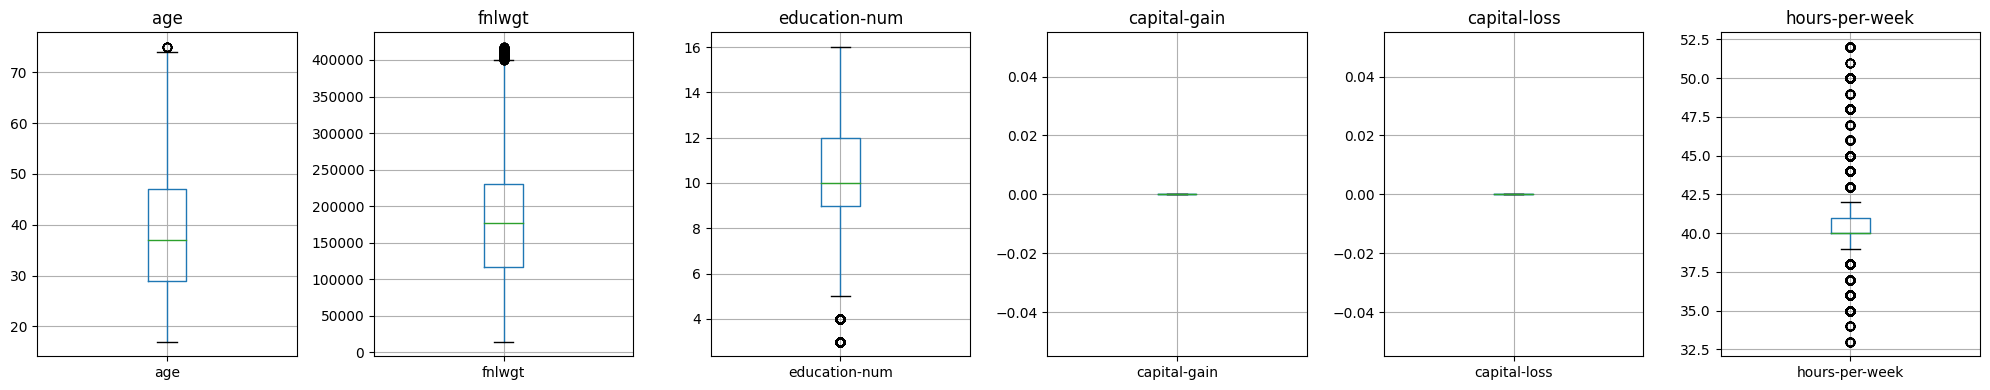

In [27]:
from matplotlib import pyplot as plt

# 박스 플롯을 그릴 열 리스트
columns_to_plot = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# 서브플롯 설정
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 4))

# 각 열에 대해 박스 플롯 생성
for i, column in enumerate(columns_to_plot):
    df2.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# 레이아웃 조정
plt.tight_layout()
plt.show()

<Figure size 1200x1200 with 0 Axes>

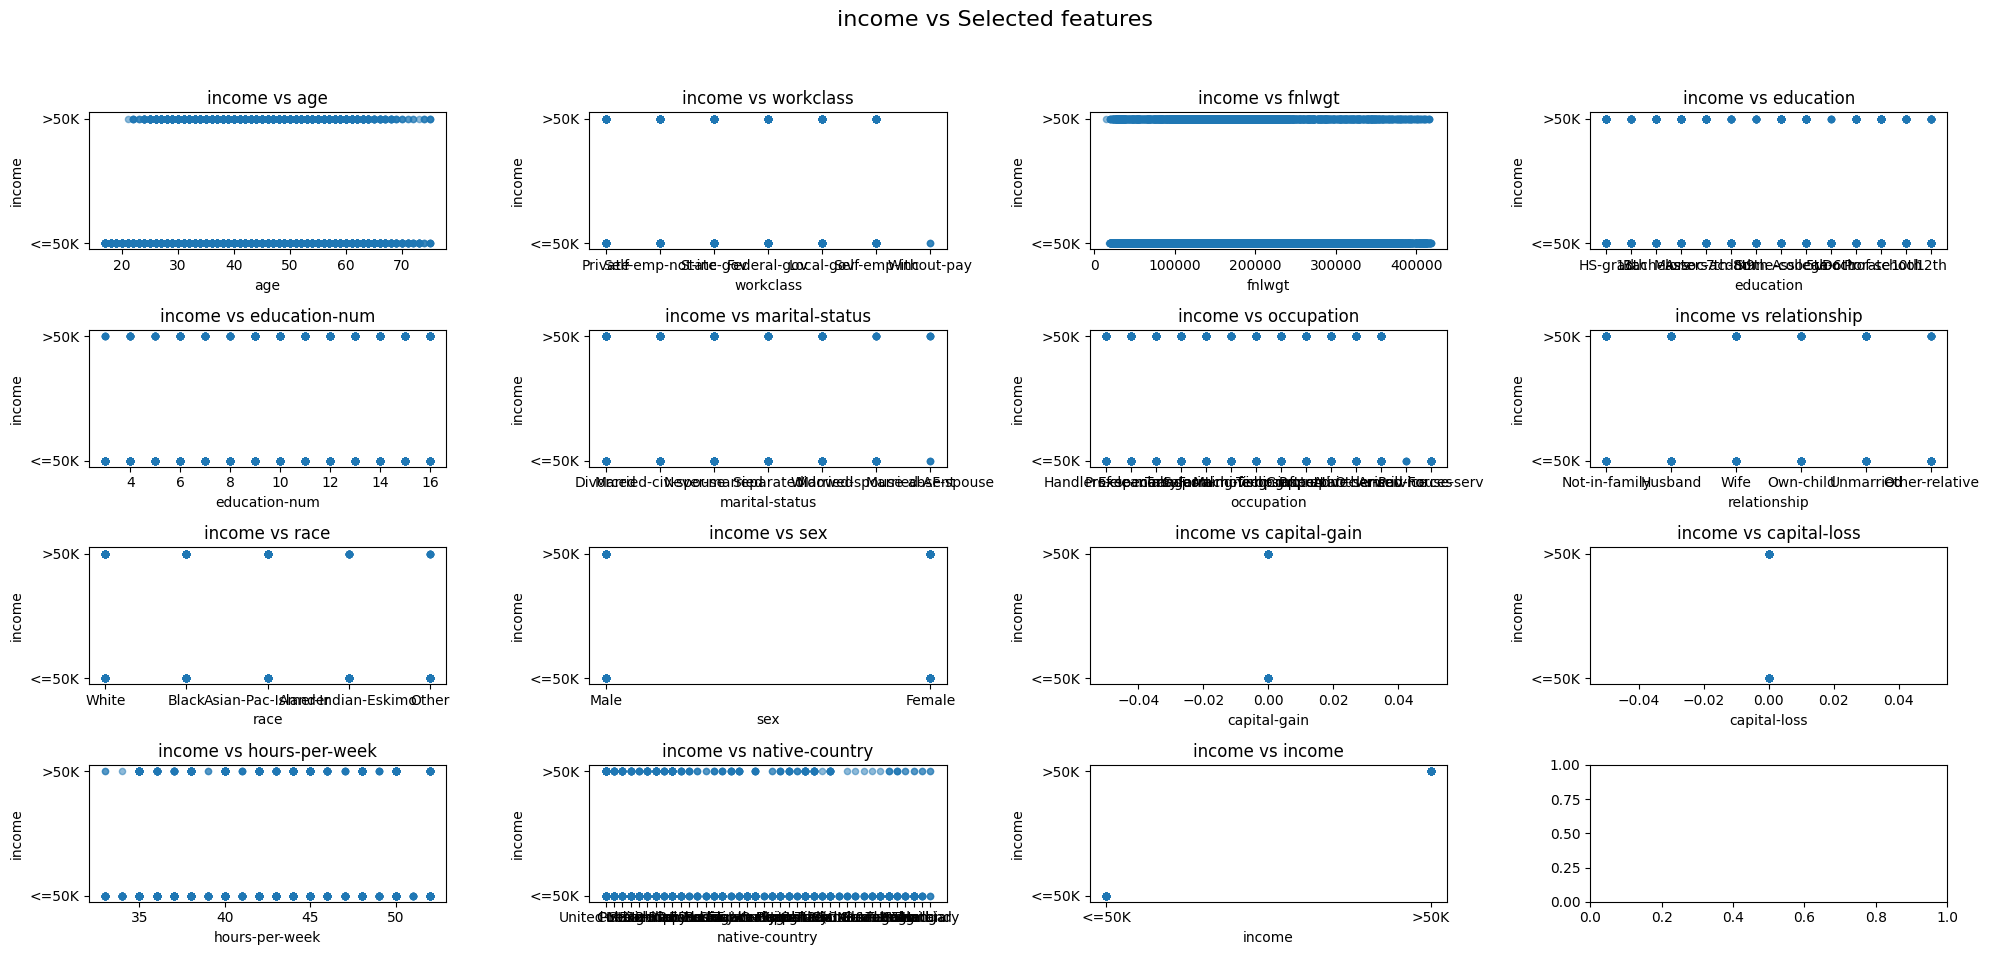

In [28]:
import matplotlib.pyplot as plt

# DF 열수
num_columns=len(df2.columns)
# 그래프 크기 결정
plt.figure(figsize=(12,12))
columns=df2.columns
target='income'
nocols=4
fig, axes=plt.subplots(nrows=4, ncols=nocols, figsize=(20, 10))
for i, col in enumerate(columns):
  row,col_idx = divmod(i,nocols)
  df2.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
  axes[row,col_idx].set_title(f"{target} vs {col}")
fig.suptitle(f'{target} vs Selected features', fontsize=16);
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);
plt.show()

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df2=df.copy()
# 4. 파생 변수를 작성합니다.
df2['age_group'] = pd.cut(df2['age'], bins=[0, 30, 40, 50, 60, 100], labels=['0-30', '31-40', '41-50', '51-60', '60+'])

## OneHotEncoder를 사용하여 범주형 변수를 인코딩합니다. 수치형 변수는 StandardScaler를 사용하여 표준화합니다.

#
# 5. 범주형 변수를 인코딩합니다.
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country', 'age_group']
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse=False), categorical_features)
    ])

# 6. 변수 선택 및 독립변수 종속변수를 분리합니다.
X = df2.drop('income', axis=1)
y = df2['income'].apply(lambda x: 1 if x == '>50K' else 0)  # binary encoding

# 7. 데이터셋을 학습용과 테스트용으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 리스트 생성
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# 모델 학습 및 평가
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # 모델 학습
    pipeline.fit(X_train, y_train)

    # 예측
    y_pred = pipeline.predict(X_test)

    # 평가
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("="*60)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: Logistic Regression
Accuracy: 0.85
Confusion Matrix:
[[6304  463]
 [ 890 1392]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6767
           1       0.75      0.61      0.67      2282

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.79      9049
weighted avg       0.84      0.85      0.85      9049



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: Decision Tree
Accuracy: 0.81
Confusion Matrix:
[[5910  857]
 [ 830 1452]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      6767
           1       0.63      0.64      0.63      2282

    accuracy                           0.81      9049
   macro avg       0.75      0.75      0.75      9049
weighted avg       0.81      0.81      0.81      9049



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: Random Forest
Accuracy: 0.85
Confusion Matrix:
[[6230  537]
 [ 854 1428]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6767
           1       0.73      0.63      0.67      2282

    accuracy                           0.85      9049
   macro avg       0.80      0.77      0.79      9049
weighted avg       0.84      0.85      0.84      9049



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: SVM
Accuracy: 0.86
Confusion Matrix:
[[6375  392]
 [ 917 1365]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      6767
           1       0.78      0.60      0.68      2282

    accuracy                           0.86      9049
   macro avg       0.83      0.77      0.79      9049
weighted avg       0.85      0.86      0.85      9049

Model: Naive Bayes
Accuracy: 0.53
Confusion Matrix:
[[2578 4189]
 [  99 2183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.38      0.55      6767
           1       0.34      0.96      0.50      2282

    accuracy                           0.53      9049
   macro avg       0.65      0.67      0.53      9049
weighted avg       0.81      0.53      0.54      9049



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: Gradient Boosting
Accuracy: 0.86
Confusion Matrix:
[[6418  349]
 [ 874 1408]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6767
           1       0.80      0.62      0.70      2282

    accuracy                           0.86      9049
   macro avg       0.84      0.78      0.81      9049
weighted avg       0.86      0.86      0.86      9049



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df3=df2.copy()

# 4. 파생 변수를 작성합니다.
df3['age_group'] = pd.cut(df3['age'], bins=[0, 30, 40, 50, 60, 100], labels=['0-30', '31-40', '41-50', '51-60', '60+'])
df3 = df3.drop(['fnlwgt'], axis=1)
## OneHotEncoder를 사용하여 범주형 변수를 인코딩합니다. 수치형 변수는 StandardScaler를 사용하여 표준화합니다.

#
# 5. 범주형 변수를 인코딩합니다.
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country', 'age_group']
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse=False), categorical_features)
    ])

# 6. 변수 선택 및 독립변수 종속변수를 분리합니다.
X = df3.drop('income', axis=1)
y = df3['income'].apply(lambda x: 1 if x == '>50K' else 0)  # binary encoding

# 7. 데이터셋을 학습용과 테스트용으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 리스트 생성
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# 모델 학습 및 평가
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # 모델 학습
    pipeline.fit(X_train, y_train)

    # 예측
    y_pred = pipeline.predict(X_test)

    # 평가
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("="*60)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: Logistic Regression
Accuracy: 0.85
Confusion Matrix:
[[6296  471]
 [ 883 1399]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6767
           1       0.75      0.61      0.67      2282

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.79      9049
weighted avg       0.84      0.85      0.85      9049



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: Decision Tree
Accuracy: 0.82
Confusion Matrix:
[[5959  808]
 [ 857 1425]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6767
           1       0.64      0.62      0.63      2282

    accuracy                           0.82      9049
   macro avg       0.76      0.75      0.75      9049
weighted avg       0.81      0.82      0.82      9049



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: Random Forest
Accuracy: 0.84
Confusion Matrix:
[[6179  588]
 [ 840 1442]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      6767
           1       0.71      0.63      0.67      2282

    accuracy                           0.84      9049
   macro avg       0.80      0.77      0.78      9049
weighted avg       0.84      0.84      0.84      9049



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: SVM
Accuracy: 0.85
Confusion Matrix:
[[6362  405]
 [ 917 1365]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      6767
           1       0.77      0.60      0.67      2282

    accuracy                           0.85      9049
   macro avg       0.82      0.77      0.79      9049
weighted avg       0.85      0.85      0.85      9049



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: Naive Bayes
Accuracy: 0.53
Confusion Matrix:
[[2581 4186]
 [  99 2183]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.38      0.55      6767
           1       0.34      0.96      0.50      2282

    accuracy                           0.53      9049
   macro avg       0.65      0.67      0.53      9049
weighted avg       0.81      0.53      0.54      9049



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: Gradient Boosting
Accuracy: 0.86
Confusion Matrix:
[[6420  347]
 [ 880 1402]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6767
           1       0.80      0.61      0.70      2282

    accuracy                           0.86      9049
   macro avg       0.84      0.78      0.80      9049
weighted avg       0.86      0.86      0.86      9049



In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   workclass       30162 non-null  object  
 2   fnlwgt          30162 non-null  int64   
 3   education       30162 non-null  object  
 4   education-num   30162 non-null  int64   
 5   marital-status  30162 non-null  object  
 6   occupation      30162 non-null  object  
 7   relationship    30162 non-null  object  
 8   race            30162 non-null  object  
 9   sex             30162 non-null  object  
 10  capital-gain    30162 non-null  int64   
 11  capital-loss    30162 non-null  int64   
 12  hours-per-week  30162 non-null  int64   
 13  native-country  30162 non-null  object  
 14  income          30162 non-null  object  
 15  age_group       30162 non-null  category
dtypes: category(1), int64(6), object(9)
memory usage: 3.7+ MB


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming df2 is already defined
df3 = df2.copy()

# 4. 파생 변수 생성
df3['age_group'] = pd.cut(df3['age'], bins=[0, 30, 40, 50, 60, 100], labels=['0-30', '31-40', '41-50', '51-60', '60+'])
df3['hours_per_week_group'] = pd.cut(df3['hours-per-week'], bins=[0, 20, 40, 60, 100], labels=['0-20', '21-40', '41-60', '60+'])
df3['capital_diff'] = df3['capital-gain'] - df3['capital-loss']

# 5. 불필요한 컬럼 제거
df3 = df3.drop(['fnlwgt'], axis=1)

# 열 이름 확인
print(df3.columns)

# 정확한 열 이름을 사용하여 독립변수와 종속변수를 분리
income_column_name = 'income'

X = df3.drop(income_column_name, axis=1)
y = df3[income_column_name].apply(lambda x: 1 if x == '>50K' else 0)  # binary encoding

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Categorical and numerical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country', 'age_group', 'hours_per_week_group']
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'capital_diff']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

# Model dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Model training and evaluation
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Model training
    pipeline.fit(X_train, y_train)

    # Prediction
    y_pred = pipeline.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("="*60)


Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'age_group', 'hours_per_week_group', 'capital_diff'],
      dtype='object')
Model: Logistic Regression
Accuracy: 0.85
Confusion Matrix:
[[6314  453]
 [ 888 1394]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6767
           1       0.75      0.61      0.68      2282

    accuracy                           0.85      9049
   macro avg       0.82      0.77      0.79      9049
weighted avg       0.85      0.85      0.85      9049

Model: Decision Tree
Accuracy: 0.81
Confusion Matrix:
[[5942  825]
 [ 862 1420]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6767
           1       0.63      0.62      0.63      2282



강사님 방법


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df3 = df2.copy()

# 4. 파생 변수 생성
df3['age_group'] = pd.cut(df3['age'], bins=[0, 30, 40, 50, 60, 100], labels=['0-30', '31-40', '41-50', '51-60', '60+'])
df3['hours_per_week_group'] = pd.cut(df3['hours-per-week'], bins=[0, 20, 40, 60, 100], labels=['0-20', '21-40', '41-60', '60+'])
df3['capital_diff'] = df3['capital-gain'] - df3['capital-loss']

# 5. 불필요한 컬럼 제거
df3 = df3.drop(['fnlwgt'], axis=1)

# 6. 범주형 변수 인코딩 (pd.get_dummies)
data = pd.get_dummies(df3, drop_first=True)

# 7. 변수 선택 및 데이터 분리
X = data.drop('income_>50K', axis=1)
y = data['income_>50K']

# 8. 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 9. 학습용과 테스트용 데이터셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 10. Logistic Regression 모델 생성 및 학습
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 11. 예측 및 평가
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.85
Confusion Matrix:
[[4193  310]
 [ 578  952]]
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.93      0.90      4503
        True       0.75      0.62      0.68      1530

    accuracy                           0.85      6033
   macro avg       0.82      0.78      0.79      6033
weighted avg       0.85      0.85      0.85      6033



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
